# Praca domowa 6
##### Kacper Cholewiński 327425
##### Zbiór danych: https://www.kaggle.com/datasets/keremabdullahoglu/laptop-price-dataset-april-2024

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned.csv")

## Opis zbioru danych

Dane dotyczą sprzedarzy laptopów, pochodzą z danych sprzedaży eBay.

In [3]:
print("Wielkość zbioru danych:", df.shape)

Wielkość zbioru danych: (2952, 10)


In [4]:
print("Typy zmiennych w zbiorze danych:\n", df.dtypes)

Typy zmiennych w zbiorze danych:
 Brand                   object
Product_Description     object
Screen_Size            float64
RAM                     object
Processor               object
GPU                     object
GPU_Type                object
Resolution              object
Condition               object
Price                  float64
dtype: object


Ramka danych ma 10 kolumn:
* producenta laptopów (np. Lenovo, Dell), 
* opis produktu podany przez producenta, 
* przekątna ekranu lapropa w calach,
* rozmiar pamięci RAM w GB,
* rodzaj procesora z generacją,
* model karty graficznej,
* rodzaj karty graficznej (wbudowana, zintegrowana),
* rodzielczość ekranu w pikselach,
* stan produktu (np. nowy, otwarte opakowanie),
* cena w dolarach

## Statystyki

In [5]:
print("Statystyki opisowe:\n", df.describe())

Statystyki opisowe:
        Screen_Size        Price
count  2952.000000  2952.000000
mean     14.550237   517.552805
std       1.175322   235.592872
min      10.000000     0.000000
25%      14.000000   325.990000
50%      14.000000   489.990000
75%      15.600000   699.000000
max      18.000000   999.990000


## Analiza zmiennych w zależności od przynależności do grup 

In [6]:
print("Średnie wartości w zależności od marki:\n", df.groupby('Brand').mean(numeric_only=True))

Średnie wartości w zależności od marki:
            Screen_Size       Price
Brand                             
AVITA        14.000000  559.970000
Acer         14.915000  554.285400
Apple        14.060000  505.198000
Asus         15.373134  547.264104
ByteSpeed    15.600000  199.990000
Chuwi        14.050000  259.990000
Dell         14.452119  480.251190
Dell Inc.    15.600000  215.990000
Eurocom      15.600000  800.000000
Gateway      14.669231  316.436923
Getac        13.300000  759.490000
Gigabyte     15.033333  631.463333
Google       13.300000  459.990000
HP           14.887889  528.359187
Huawei       13.900000  399.600000
Intel        14.550000  724.995000
LG           16.031579  694.176579
Lenovo       14.503668  492.255518
MSI          15.374194  718.793226
Microsoft    13.082741  611.832843
Panasonic    11.240000  584.658000
Razer        15.150000  499.745000
Ruggon       10.100000  800.000000
Samsung      14.513115  647.595082
Sony         14.100000  534.660000


## Rozkład zmiennych w zbiorze danych

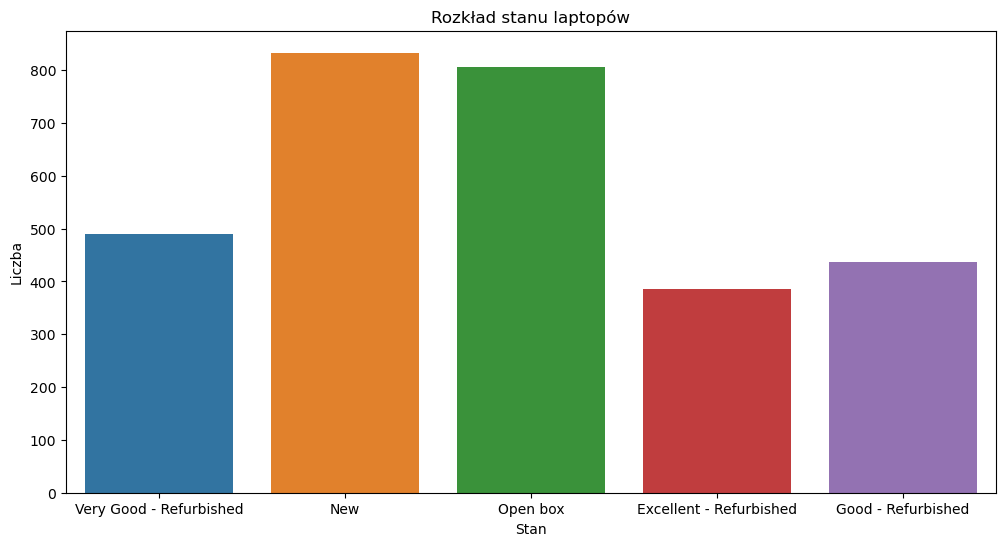

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Condition')
plt.title('Rozkład stanu laptopów')
plt.xlabel('Stan')
plt.ylabel('Liczba')
plt.show()

Wykres przedstawia rozkład stanu laptopów w analizowanym zbiorze. Najczęściej występują nowe laptopy, ale ich liczba jest zbliżona do liczby laptopów z otwartym pudełkiem. Pozostałe kategorie są rzadsze. 

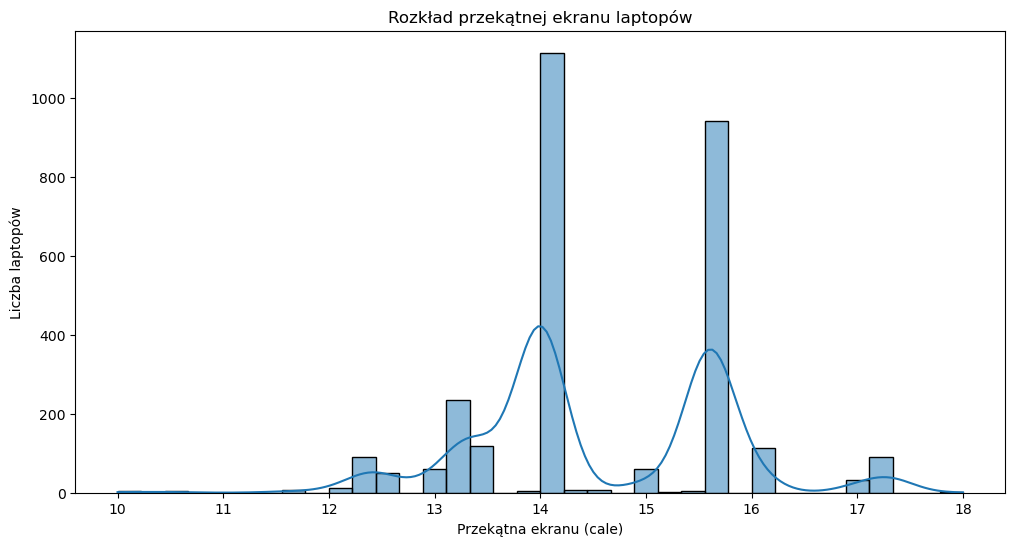

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Screen_Size'], kde=True)
plt.title('Rozkład przekątnej ekranu laptopów')
plt.xlabel('Przekątna ekranu (cale)')
plt.ylabel('Liczba laptopów')
plt.show()

Wykres przedstawia rozkład przekątnej ekranów laptopów. Najczęściej występujące przekątne ekranu to 14 i 15,5 cala. Pozostałe przekątne spotykane są dużo rzadziej.

## Zależności w zbiorze danych

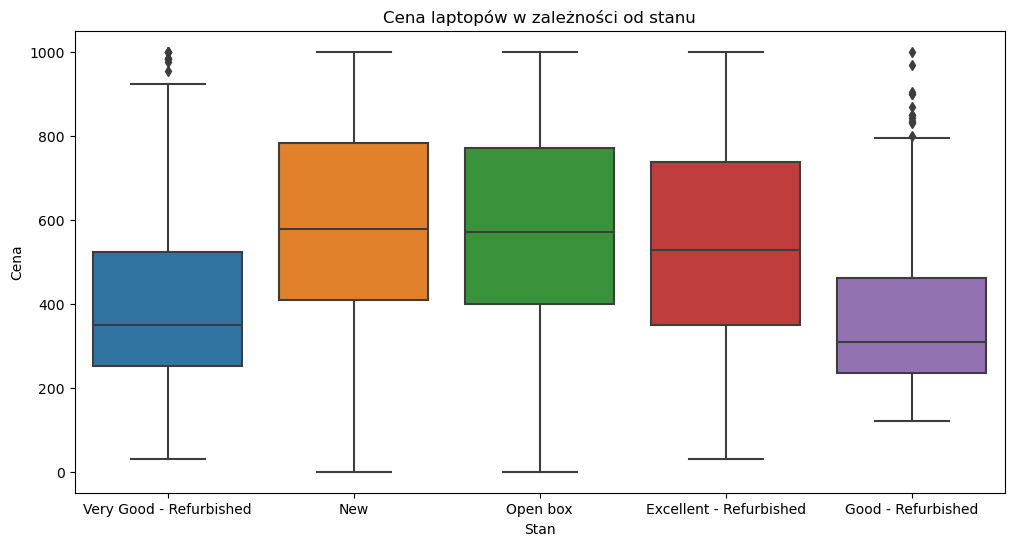

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Condition', y='Price')
plt.title('Cena laptopów w zależności od stanu')
plt.xlabel('Stan')
plt.ylabel('Cena')
plt.show()

Przedstawiony wykres pokazuje zależność ceny laptopa w zależności od jego stanu. Największą medianę i kwartyle ceny osiągneły laptopy nowe i z otwartym pudełkiem. Najmniejsze ceny mają laptopy odnowione w dobrym i bardzo dobtym stanie. Różnica między ceną odnowionego laptopa w idealnym stanie jest tylko nieco niższa niż nowego.

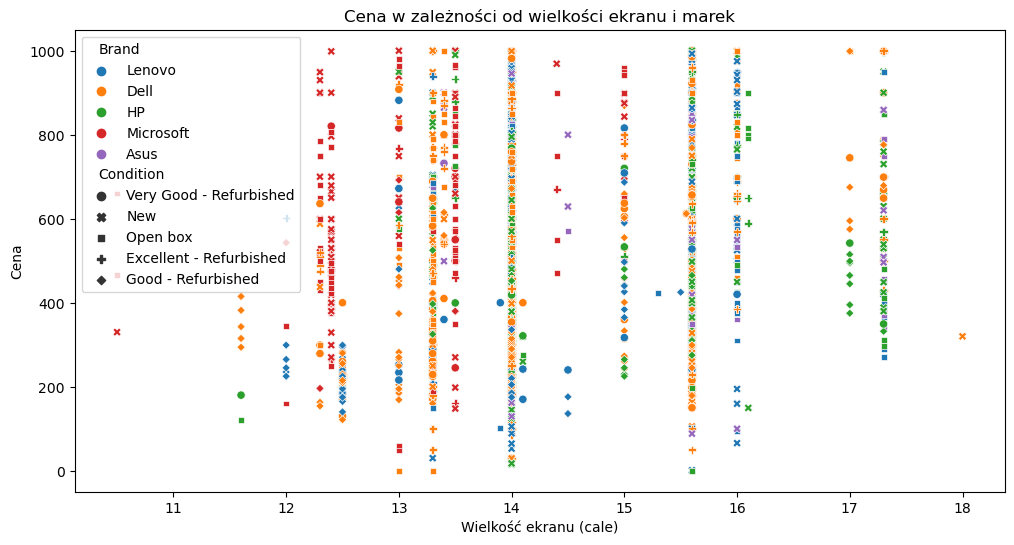

In [10]:
data = df.loc[df['Brand'].apply(lambda x: x in df['Brand'].value_counts().nlargest(5).index)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Screen_Size', y='Price', hue='Brand', style='Condition')
plt.title('Cena w zależności od wielkości ekranu i marek')
plt.xlabel('Wielkość ekranu (cale)')
plt.ylabel('Cena')
plt.show()


Wykres pokazuje zależności między wielkością ekranu, stanem, marką i ceną laptopów, dla laptopów produkowanych przez 5 największych marek. Zagęszczenie punktów na pionowych liniach jest spowodowane tylko niektórymi wartościami przekątnych ekranu - produkowane są laptopy o typowych wielkościach ekranu. Laptopy o niektórych wielkościach ekranu są produkowane tylko przez wybrane marki np. przekątne 12-13 cali to głównie laptopy Microsoft, natomiast laptopy w cenie ok. 400 dolarów i przekątnej ekranu ponad 17 cali to często marka HP. Widać też zależność, że im większa cena tym więcej laptopów nowych, dla każdej przekątnej ekranu. 